<a href="https://colab.research.google.com/github/milica-tomic/Parkinson-s_disease_detection/blob/main/Parkinson%E2%80%99s_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [ ]:
df = pd.read_csv("ReplicatedAcousticFeatures-ParkinsonDatabase.csv")
df.head(10)

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.263130,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.202170,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.167100,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.208920,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.116070,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023
5,CONT-02,3,0,0,0.16489,0.000010,0.000819,0.001191,0.010666,0.094738,...,1.480657,1.675417,1.373460,1.709614,1.444187,1.383488,1.625396,1.651655,1.652845,1.427623
6,CONT-03,1,0,1,0.22506,0.000014,0.001358,0.001460,0.017181,0.148120,...,1.712147,1.419443,1.501822,1.503534,1.486685,1.648505,1.345959,1.741863,1.828781,1.655604
7,CONT-03,2,0,1,0.23086,0.000015,0.001349,0.001546,0.017775,0.157800,...,1.535326,1.627976,1.332839,1.254560,1.598743,1.297679,1.526714,1.647910,1.662981,1.609652
8,CONT-03,3,0,1,0.22898,0.000015,0.001375,0.001607,0.020110,0.175770,...,1.620783,1.431508,1.598949,1.394543,1.459370,1.313012,1.447470,1.354798,1.585025,1.334293
9,CONT-04,1,0,1,1.31000,0.000103,0.008245,0.006280,0.030742,0.270640,...,1.541010,1.347021,1.526148,1.428505,1.516130,1.491684,1.579521,1.374581,1.550638,1.572821


In [ ]:
df.shape

(240, 48)

In [ ]:
df.describe()

,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.000000,0.500000,0.400000,0.583987,0.000044,0.003172,0.003532,0.038428,0.336832,0.021499,...,1.343238,1.348914,1.337717,1.341786,1.340895,1.343978,1.341472,1.331433,1.346381,1.346144
std,0.818203,0.501045,0.490922,0.535769,0.000045,0.003373,0.004449,0.023213,0.205905,0.013787,...,0.198174,0.212008,0.204978,0.209407,0.213689,0.211364,0.204085,0.211297,0.221484,0.208819
min,1.000000,0.000000,0.000000,0.148010,0.000007,0.000678,0.001036,0.007444,0.064989,0.003344,...,0.766458,0.840133,0.741690,0.759689,0.764649,0.762798,0.811942,0.777012,0.643132,0.748411
25%,1.000000,0.000000,0.000000,0.298260,0.000019,0.001551,0.001867,0.024336,0.211785,0.012910,...,1.208624,1.221101,1.197868,1.194186,1.194138,1.191881,1.189515,1.192397,1.202525,1.206559
50%,2.000000,0.500000,0.000000,0.481455,0.000035,0.002337,0.002870,0.032960,0.287885,0.018571,...,1.351015,1.342237,1.337233,1.338437,1.344416,1.335517,1.349243,1.333345,1.347297,1.331212
75%,3.000000,1.000000,1.000000,0.681685,0.000056,0.003678,0.003991,0.045475,0.399860,0.025784,...,1.488878,1.470287,1.485597,1.496845,1.490389,1.495355,1.475330,1.472589,1.506674,1.475235
max,3.000000,1.000000,1.000000,6.838200,0.000550,0.043843,0.065199,0.192600,1.747600,0.113240,...,1.860588,2.038241,1.785984,1.988090,1.872799,1.920131,1.943331,1.949679,1.918392,1.930103


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          240 non-null    object 
 1   Recording   240 non-null    int64  
 2   Status      240 non-null    int64  
 3   Gender      240 non-null    int64  
 4   Jitter_rel  240 non-null    float64
 5   Jitter_abs  240 non-null    float64
 6   Jitter_RAP  240 non-null    float64
 7   Jitter_PPQ  240 non-null    float64
 8   Shim_loc    240 non-null    float64
 9   Shim_dB     240 non-null    float64
 10  Shim_APQ3   240 non-null    float64
 11  Shim_APQ5   240 non-null    float64
 12  Shi_APQ11   240 non-null    float64
 13  HNR05       240 non-null    float64
 14  HNR15       240 non-null    float64
 15  HNR25       240 non-null    float64
 16  HNR35       240 non-null    float64
 17  HNR38       240 non-null    float64
 18  RPDE        240 non-null    float64
 19  DFA         240 non-null    f

# Data Preprocessing  

The dataset contains multiple acoustic feature measurements from three voice
recordings per subject, which creates a challenge for standard machine
learning methods because they assume all samples are independent. Before training machine learning models, it is necessary to ensure the independence of the data. The simplest solution is to calculate the mean of the three voice recordings for each subject, thereby reducing the dataset from 240 to 80 samples and resolving the issue of dependency.

Additionally, before training, the ID and Recording features should be removed because they are not relevant for prediction, and the Status feature should be excluded from the feature set, as it serves as the target variable for evaluating the models.

Finally, it is recommended to standardize the features to ensure comparability across variables before model training.


In [ ]:
# Exclude the features ID, Recording and Status

features = [col for col in df.columns if col not in ['ID', 'Recording', 'Status']]

# Find the three recordings for the same subject and calculate the mean

X = df.groupby('ID')[features].mean()

# Status should be identical for all recordings of the same subject, so we keep first recording per subject

y = df.groupby('ID')['Status'].first()

# Standardize the features

scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)


In [ ]:
X_standardized.describe()

,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
count,8.000000e+01,8.000000e+01,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,...,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01
mean,-4.440892e-17,-1.998401e-16,0.000000,-2.220446e-17,-6.661338e-17,2.220446e-16,2.442491e-16,-8.881784e-17,-1.998401e-16,-2.220446e-16,...,-3.386180e-16,-1.693090e-16,-8.992806e-16,6.890322e-16,-1.082467e-15,-4.662937e-16,-3.885781e-17,4.996004e-17,-5.995204e-16,8.382184e-16
std,1.006309e+00,1.006309e+00,1.006309,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,...,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00
min,-8.164966e-01,-9.792584e-01,-1.049718,-8.692420e-01,-7.282337e-01,-1.486978e+00,-1.467719e+00,-1.499730e+00,-1.477358e+00,-1.449727e+00,...,-2.378996e+00,-2.193616e+00,-2.308734e+00,-2.232780e+00,-2.111456e+00,-2.212761e+00,-2.294728e+00,-1.976537e+00,-2.085160e+00,-2.212950e+00
25%,-8.164966e-01,-6.119790e-01,-0.671999,-5.873633e-01,-5.156265e-01,-6.496508e-01,-6.504529e-01,-6.693499e-01,-6.033993e-01,-6.365983e-01,...,-6.382872e-01,-6.817118e-01,-6.168504e-01,-5.690120e-01,-7.001487e-01,-6.961599e-01,-5.728580e-01,-7.153080e-01,-6.966129e-01,-5.962391e-01
50%,-8.164966e-01,-2.479132e-01,-0.227410,-2.800525e-01,-2.403518e-01,-2.497997e-01,-2.395759e-01,-2.317633e-01,-2.869548e-01,-2.187858e-01,...,1.473865e-02,-1.328647e-02,-8.413585e-02,-2.752917e-02,7.705108e-02,-9.508999e-02,2.433157e-02,8.557960e-02,1.013029e-02,-7.344542e-02
75%,1.224745e+00,2.897788e-01,0.388269,2.425430e-01,7.217237e-02,3.225885e-01,2.337055e-01,3.101940e-01,2.249666e-01,2.624650e-01,...,7.501951e-01,7.650084e-01,8.279381e-01,7.363115e-01,6.803407e-01,8.106996e-01,6.489445e-01,7.603861e-01,7.384922e-01,6.651056e-01
max,1.224745e+00,5.876445e+00,5.153896,6.252127e+00,7.285775e+00,4.291989e+00,4.238364e+00,3.959753e+00,4.952244e+00,5.081118e+00,...,1.976992e+00,3.009096e+00,1.831128e+00,2.510094e+00,2.159146e+00,2.380901e+00,1.773545e+00,2.220890e+00,2.352354e+00,2.725055e+00


In [ ]:
X_standardized.shape

(80, 45)

# Spliting dataset into training and test dataset

Spliting ratio - 90:10

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_standardized,y,test_size=0.1,random_state=10,stratify=y)
print(x_train.shape)
print(x_test.shape)

(72, 45)
(8, 45)


In [ ]:
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4]
}

svm_model = SVC(random_state = 42)
svm_grid = GridSearchCV(
    estimator=svm_model,
    param_grid=svm_param_grid,
    scoring='recall',
    cv=5,
    verbose=3
)

svm_grid.fit(x_train, y_train)
print("Best SVM Recall:", svm_grid.best_score_)
print("Best SVM Params:", svm_grid.best_params_)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END C=0.01, degree=2, gamma=scale, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=0.01, degree=2, gamma=scale, kernel=linear;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.01, degree=2, gamma=scale, kernel=linear;, score=0.571 total time=   0.0s
[CV 4/5] END C=0.01, degree=2, gamma=scale, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=0.01, degree=2, gamma=scale, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=0.01, degree=2, gamma=scale, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END C=0.01, degree=2, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5] END C=0.01, degree=2, gamma=scale, kernel=rbf;, score=0.571 total time=   0.0s
[CV 4/5] END C=0.01, degree=2, gamma=scale, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END C=0.01, degree=2, gamma=scale, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/5] END C=0.01, degree=2, gamma=scal

In [ ]:
adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.3, 0.5, 1.0],
}

adaboost_model = AdaBoostClassifier(random_state = 42)
adaboost_grid = GridSearchCV(
    estimator=adaboost_model,
    param_grid=adaboost_param_grid,
    scoring='recall',
    cv=5,
    verbose=3
)

adaboost_grid.fit(x_train, y_train)
print("Best AdaBoost Recall:", adaboost_grid.best_score_)
print("Best AdaBoost Params:", adaboost_grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.3, n_estimators=50;, score=0.714 total time=   0.1s
[CV 2/5] END learning_rate=0.3, n_estimators=50;, score=0.500 total time=   0.1s
[CV 3/5] END learning_rate=0.3, n_estimators=50;, score=0.714 total time=   0.1s
[CV 4/5] END learning_rate=0.3, n_estimators=50;, score=0.857 total time=   0.1s
[CV 5/5] END learning_rate=0.3, n_estimators=50;, score=0.857 total time=   0.1s
[CV 1/5] END learning_rate=0.3, n_estimators=100;, score=0.714 total time=   0.2s
[CV 2/5] END learning_rate=0.3, n_estimators=100;, score=0.500 total time=   0.2s
[CV 3/5] END learning_rate=0.3, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END learning_rate=0.3, n_estimators=100;, score=0.857 total time=   0.2s
[CV 5/5] END learning_rate=0.3, n_estimators=100;, score=0.857 total time=   0.2s
[CV 1/5] END learning_rate=0.3, n_estimators=200;, score=0.714 total time=   0.4s
[CV 2/5] END learning_rate=0.3, n_estimator

In [ ]:
model1 = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_Recall',
    patience=5,
    restore_best_weights=True
)

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
history1 = model1.fit(x_train, y_train, epochs=50, batch_size=8, validation_split=0.1, callbacks=[early_stop], verbose=1)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - Recall: 0.0542 - loss: 1.1500 - val_Recall: 0.0000e+00 - val_loss: 0.8993
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.0933 - loss: 0.8927 - val_Recall: 0.0000e+00 - val_loss: 0.7570
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.1666 - loss: 0.7408 - val_Recall: 0.0000e+00 - val_loss: 0.6431
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.3568 - loss: 0.6847 - val_Recall: 0.0000e+00 - val_loss: 0.5661
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.6397 - loss: 0.5248 - val_Recall: 0.3333 - val_loss: 0.5069
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.6468 - loss: 0.5127 - val_Recall: 0.6667 - val_loss: 0.4647
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - Recall: 0.7053 - loss: 0.5414 - val_Recall: 0.6667 - val_loss: 0.4409
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.6632 - loss: 0.5043 - val_Recall: 0.6667 - val_loss: 0.4211
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━

In [ ]:
model2 = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_Recall',
    patience=5,
    restore_best_weights=True
)

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
history2 = model2.fit(x_train, y_train, epochs=50, batch_size=8, validation_split=0.1, callbacks=[early_stop], verbose=1)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - Recall: 0.3279 - loss: 0.8093 - val_Recall: 0.3333 - val_loss: 0.5961
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - Recall: 0.5547 - loss: 0.6677 - val_Recall: 0.6667 - val_loss: 0.5129
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - Recall: 0.5170 - loss: 0.5858 - val_Recall: 0.6667 - val_loss: 0.4564
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - Recall: 0.6862 - loss: 0.5292 - val_Recall: 0.6667 - val_loss: 0.4176
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - Recall: 0.6174 - loss: 0.6371 - val_Recall: 0.6667 - val_loss: 0.3938
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.8731 - loss: 0.4252 - val_Recall: 0.6667 - val_loss: 0.3716
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.9202 - loss: 0.4342 - val_Recall: 0.6667 - val_loss: 0.3543


In [ ]:
model3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_Recall',
    patience=5,
    restore_best_weights=True
)

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
history3 = model3.fit(x_train, y_train, epochs=50, batch_size=8, validation_split=0.1, callbacks = [early_stop], verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - Recall: 0.7875 - loss: 0.6771 - val_Recall: 0.6667 - val_loss: 0.6135
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - Recall: 0.8219 - loss: 0.6290 - val_Recall: 0.6667 - val_loss: 0.4881
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - Recall: 0.7769 - loss: 0.4974 - val_Recall: 0.6667 - val_loss: 0.4055
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.8426 - loss: 0.4823 - val_Recall: 0.6667 - val_loss: 0.3366
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.9760 - loss: 0.4038 - val_Recall: 0.6667 - val_loss: 0.2897
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.9016 - loss: 0.4236 - val_Recall: 0.6667 - val_loss: 0.2653


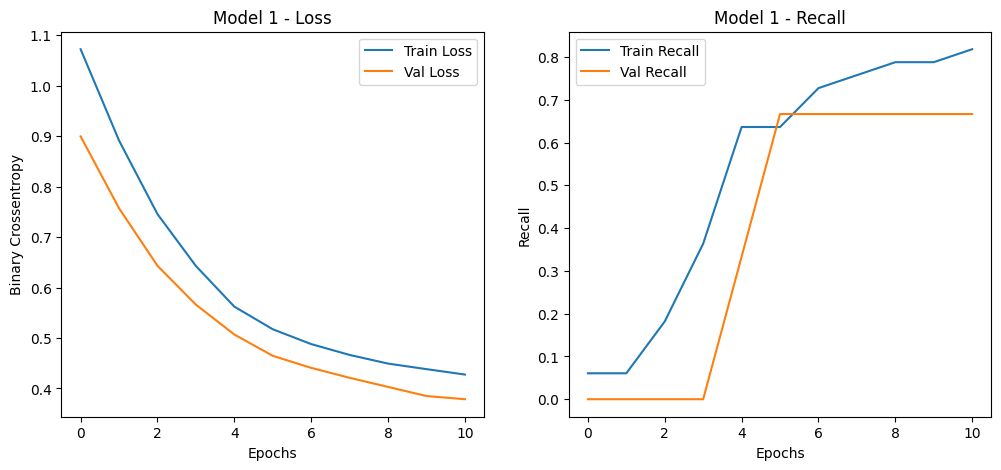

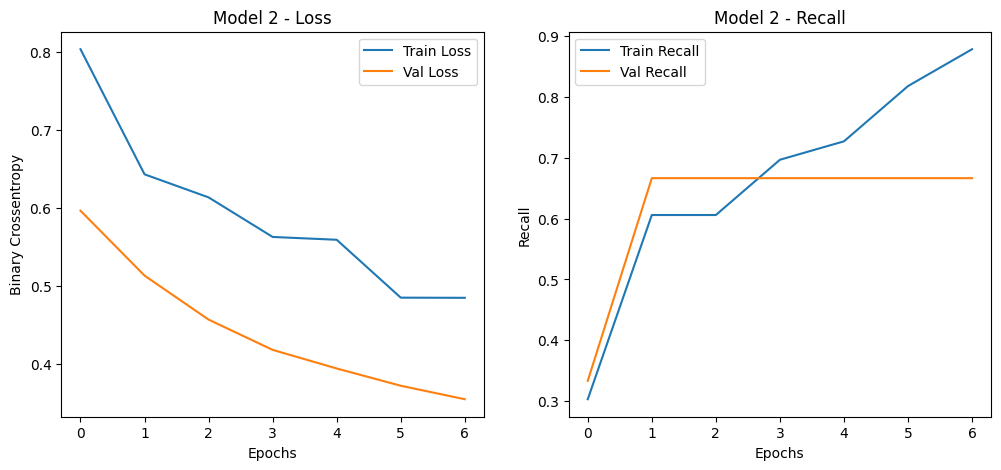

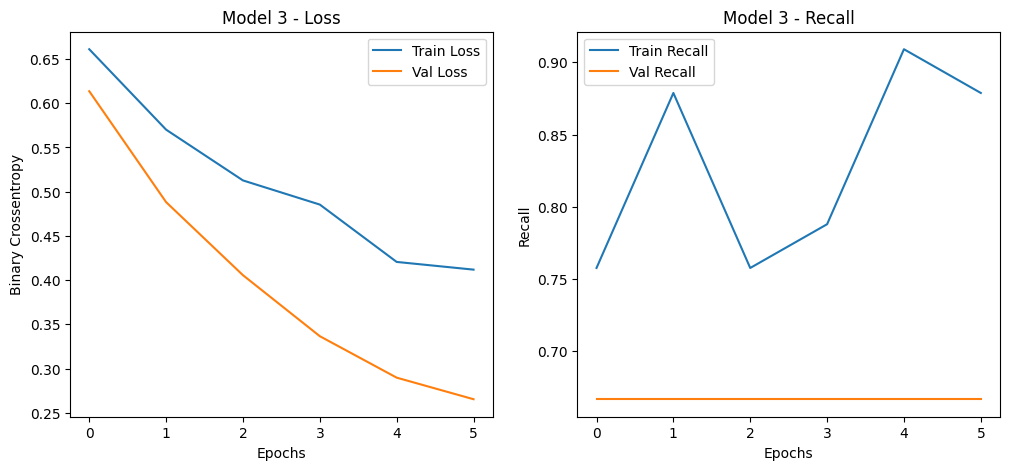

In [ ]:
def plot_training_curves(history, model_name="Model"):
    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Binary Crossentropy')
    plt.legend()

    # Plot Recall
    plt.subplot(1, 2, 2)
    plt.plot(history.history['Recall'], label='Train Recall')
    plt.plot(history.history['val_Recall'], label='Val Recall')
    plt.title(f'{model_name} - Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()

# Use for each model's history, e.g.:
plot_training_curves(history1, "Model 1")
plot_training_curves(history2, "Model 2")
plot_training_curves(history3, "Model 3")

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

SVM Results:
Recall: 1.0
Accuracy: 0.875
Precision: 0.8
F1 Score: 0.8888888888888888


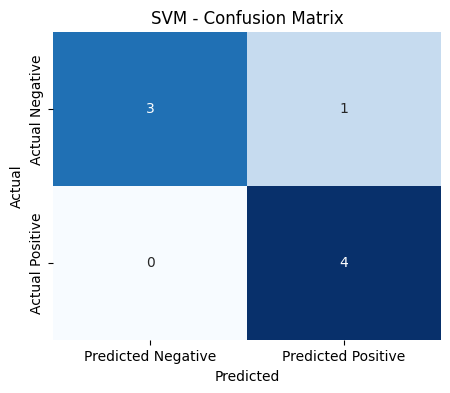


-----

AdaBoost Results:
Recall: 1.0
Accuracy: 0.75
Precision: 0.6666666666666666
F1 Score: 0.8


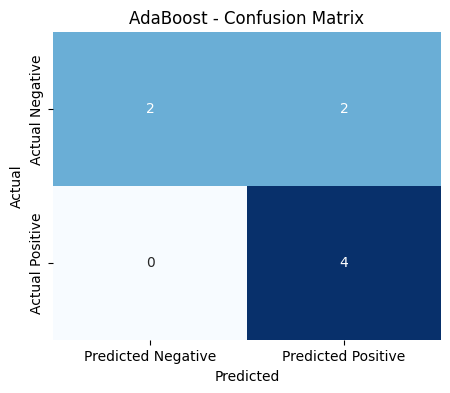

In [ ]:
# After fitting grid search:
best_svm = svm_grid.best_estimator_
best_adaboost = adaboost_grid.best_estimator_

# Evaluate SVM
y_pred_svm = best_svm.predict(x_test)
print("SVM Results:")
print("Recall:", recall_score(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')

print("\n-----\n")

# Evaluate AdaBoost
y_pred_adaboost = best_adaboost.predict(x_test)
print("AdaBoost Results:")
print("Recall:", recall_score(y_test, y_pred_adaboost))
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Precision:", precision_score(y_test, y_pred_adaboost))
print("F1 Score:", f1_score(y_test, y_pred_adaboost))
plot_confusion_matrix(y_test, y_pred_adaboost, 'AdaBoost')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
MODEL 1 RESULTS:
Accuracy: 0.875
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571


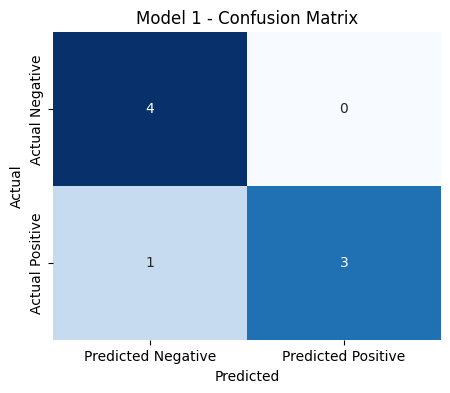


-----

MODEL 2 RESULTS:
Accuracy: 0.875
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571


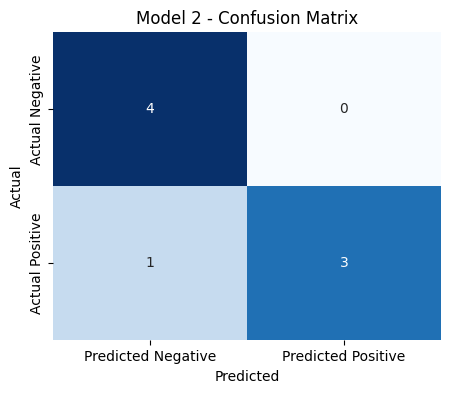


-----

MODEL 3 RESULTS:
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666


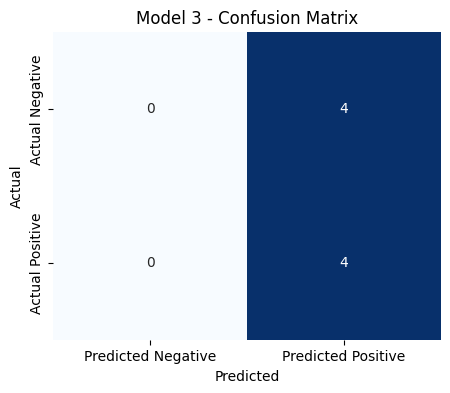

In [ ]:
y_pred_NN1 = (model1.predict(x_test) > 0.5).astype(int).flatten()
y_pred_NN2 = (model2.predict(x_test) > 0.5).astype(int).flatten()
y_pred_NN3 = (model3.predict(x_test) > 0.5).astype(int).flatten()

print("MODEL 1 RESULTS:")
print("Accuracy:", accuracy_score(y_test, y_pred_NN1))
print("Precision:", precision_score(y_test, y_pred_NN1))
print("Recall:", recall_score(y_test, y_pred_NN1))
print("F1 Score:", f1_score(y_test, y_pred_NN1))
plot_confusion_matrix(y_test, y_pred_NN1, 'Model 1')

print("\n-----\n")

print("MODEL 2 RESULTS:")
print("Accuracy:", accuracy_score(y_test, y_pred_NN2))
print("Precision:", precision_score(y_test, y_pred_NN2))
print("Recall:", recall_score(y_test, y_pred_NN2))
print("F1 Score:", f1_score(y_test, y_pred_NN2))
plot_confusion_matrix(y_test, y_pred_NN2, 'Model 2')

print("\n-----\n")

print("MODEL 3 RESULTS:")
print("Accuracy:", accuracy_score(y_test, y_pred_NN3))
print("Precision:", precision_score(y_test, y_pred_NN3))
print("Recall:", recall_score(y_test, y_pred_NN3))
print("F1 Score:", f1_score(y_test, y_pred_NN3))
plot_confusion_matrix(y_test, y_pred_NN3, 'Model 3')
